# Primer corte del proyecto final de Estadística

### Tema de la BD: 
Precio de las Laptop. Los datos fueron obtenidos a traves del siguiente enlace: (https://www.kaggle.com/datasets/abdocan/laptop-prices)

### Integrantes:
- Carlos Daniel Largacha Leal  C312
- Gabriel Andrés Pla Lasa  C311

## Importación de las librerías necesarias

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats


## 1. Carga de datos

In [2]:
laptop_data = pd.read_csv('laptop_prices.csv')

## 2. Análisis descriptivo de los datos

#### 2.1 Infomacion general del dataset

In [3]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### 2.2 Primeras filas del dataset

In [4]:
print(laptop_data.head())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

#### 2.3 Análisis de los datos numéricos

In [5]:
# Calcular la moda para cada columna y añadirla al resumen
mode_summary = laptop_data.mode().iloc[0]  # La moda puede tener múltiples valores; tomamos el primero
extended_summary = laptop_data.describe().transpose()

# Añadir una columna para la moda
extended_summary['mode'] = mode_summary

# Mostrar el resumen extendido
extended_summary


,count,mean,std,min,25%,50%,75%,max,mode
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4,15.6
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0,8.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7,2.2
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0,1099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0,1920.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0,1080.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6,2.5
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0,256.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0,0.0


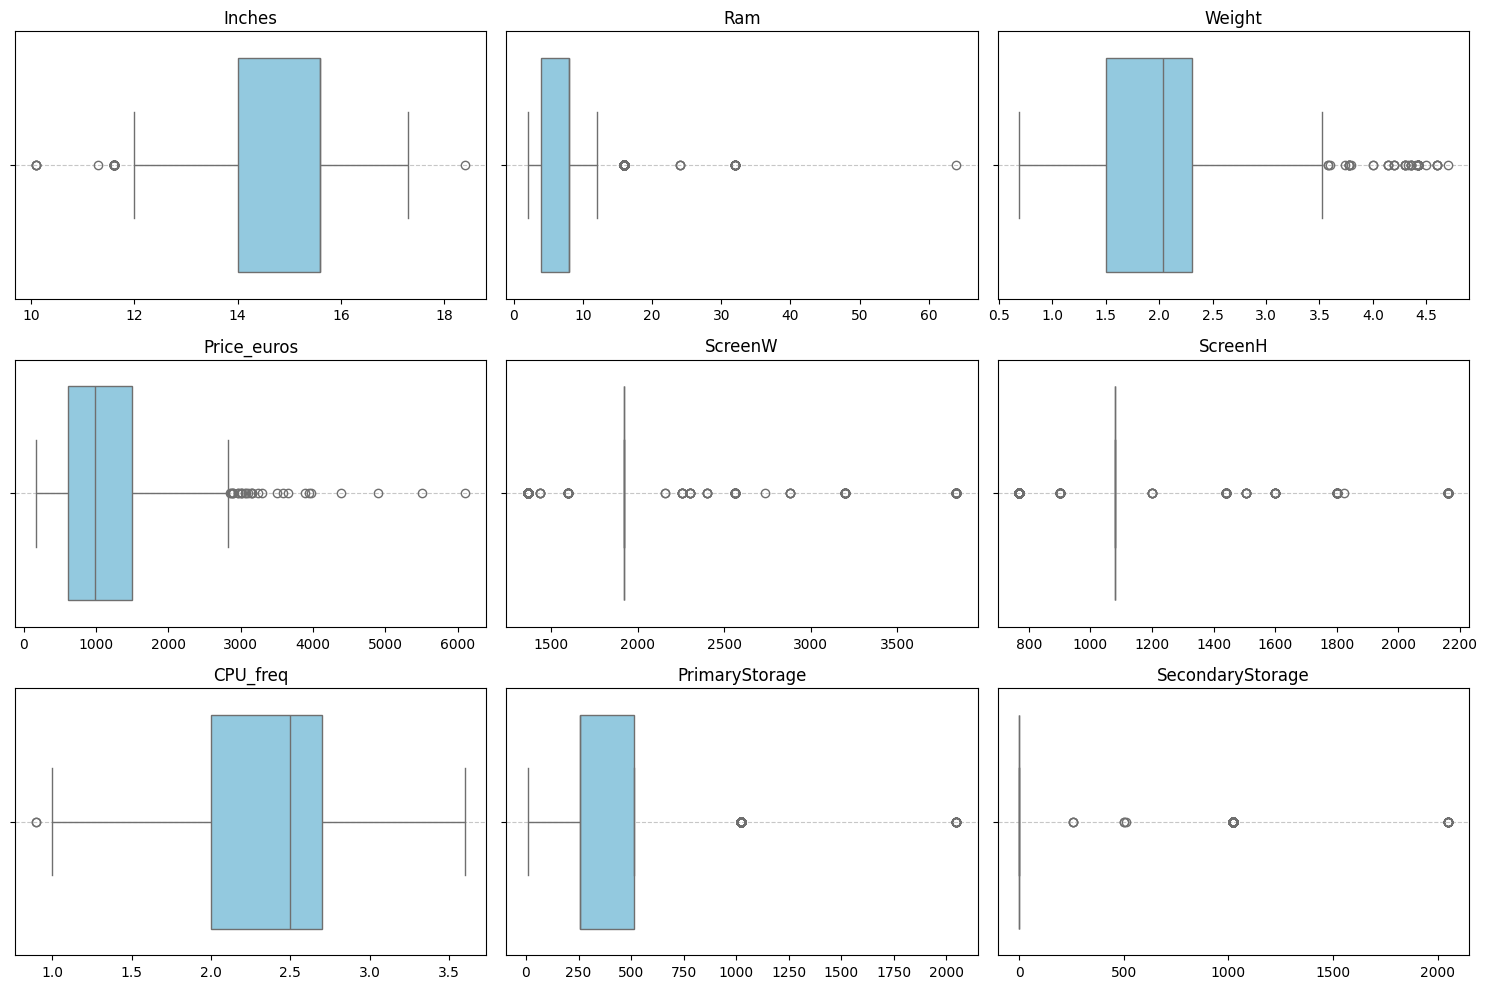

In [6]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=laptop_data, x=col, color='skyblue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


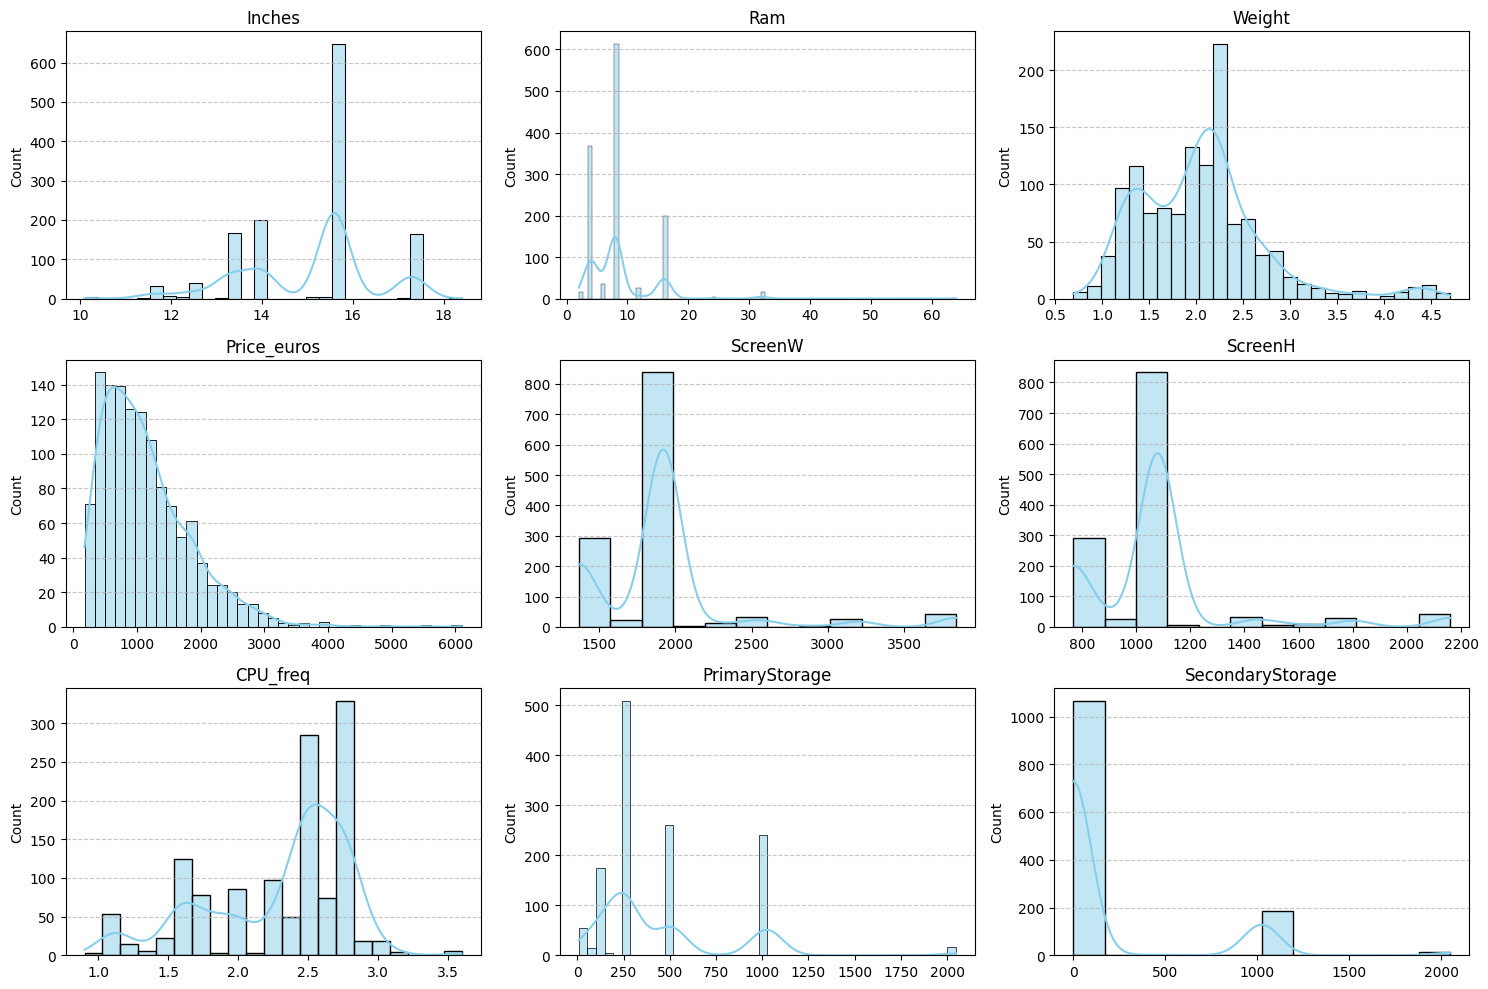

In [7]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=laptop_data, x=col, color='skyblue', kde=True)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
def plot_histogram_and_boxplot(data, columns):
    """
    Genera un histograma y un boxplot para cada columna dada.

    Args:
    data (DataFrame): Dataset que contiene las columnas.
    columns (list): Lista de nombres de columnas a graficar.
    """
    for column in columns:
        if column not in data.columns:
            print(f"La columna '{column}' no existe en el dataset.")
            continue
        
        # Crear una figura con dos subplots
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'Análisis de {column}', fontsize=16)
        
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f'Histograma de {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot
        sns.boxplot(data[column], ax=axes[1], color="orange")
        axes[1].set_title(f'Boxplot de {column}')
        axes[1].set_xlabel(column)
        
        # Mostrar los gráficos
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta para no sobreponer el título
        plt.show()


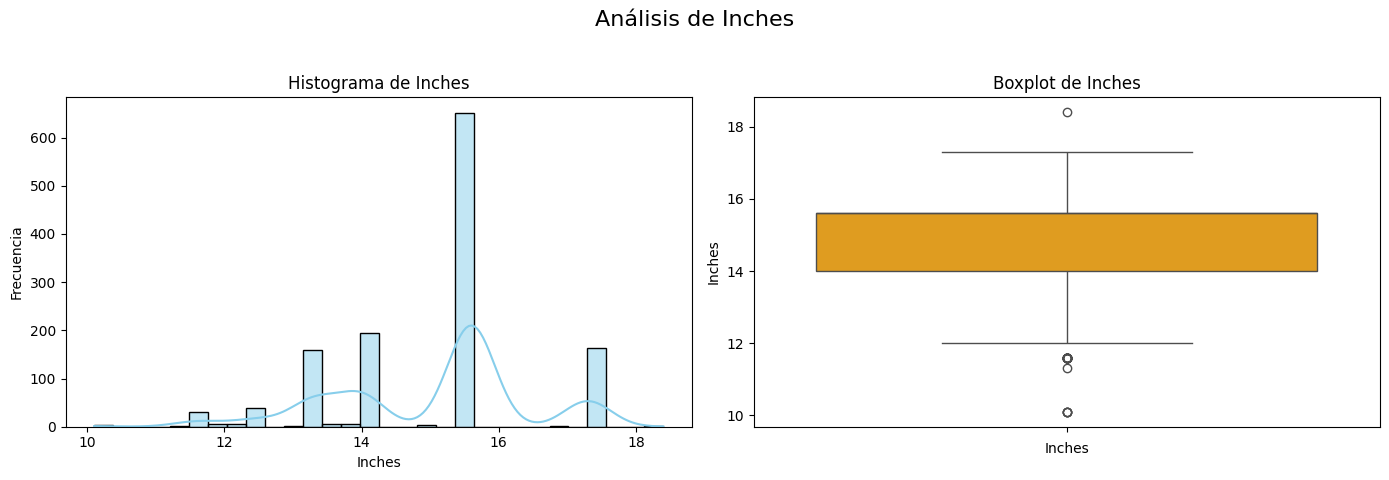

In [9]:
plot_histogram_and_boxplot(laptop_data, ['Inches'])

#### Inches (Tamaño de Pantalla)

- **Rango típico:** La mayoría de las laptops tienen tamaños de pantalla entre 13 y 15 pulgadas, lo que refleja una preferencia por tamaños estándar.  
- **Valores atípicos:** Se observan laptops pequeñas (11 pulgadas) y algunas significativamente grandes (17 pulgadas o más). Estos extremos suelen estar orientados a la portabilidad extrema (pequeñas) o al mercado de gaming/diseño (grandes).  
- **Distribución:** Leve sesgo hacia tamaños más pequeños, indicando que laptops más compactas son ligeramente más frecuentes.  

**Conclusión:** Los tamaños reflejan un equilibrio entre portabilidad y funcionalidad, con excepciones notables en ambos extremos.


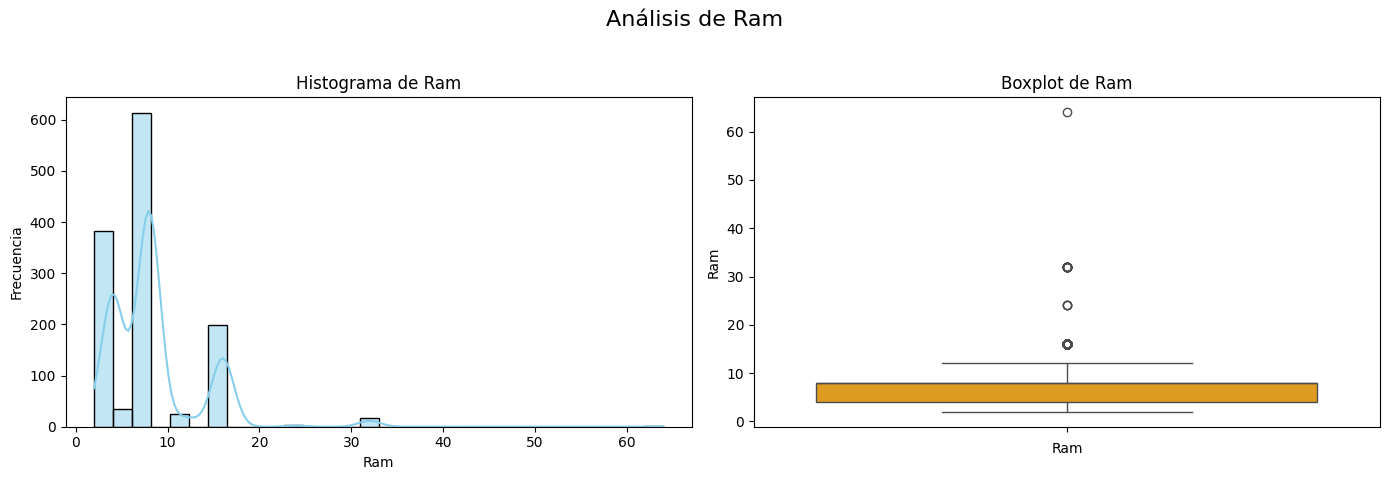

In [25]:
plot_histogram_and_boxplot(laptop_data, ['Ram'])

#### RAM

- **Rango típico:** La mayoría de las laptops tienen entre 8 GB y 16 GB de RAM, que es la configuración estándar en laptops modernas.  
- **Valores atípicos:** Se observan laptops con RAM alta (32 GB o 64 GB), típicas de estaciones de trabajo o gaming de alta gama.  
- **Distribución:** No hay un sesgo claro, pero los valores extremos resaltan el incremento en la demanda de RAM en modelos premium.  

**Conclusión:** El mercado parece centrado en configuraciones que equilibran precio y rendimiento, con opciones premium para usuarios más exigentes.


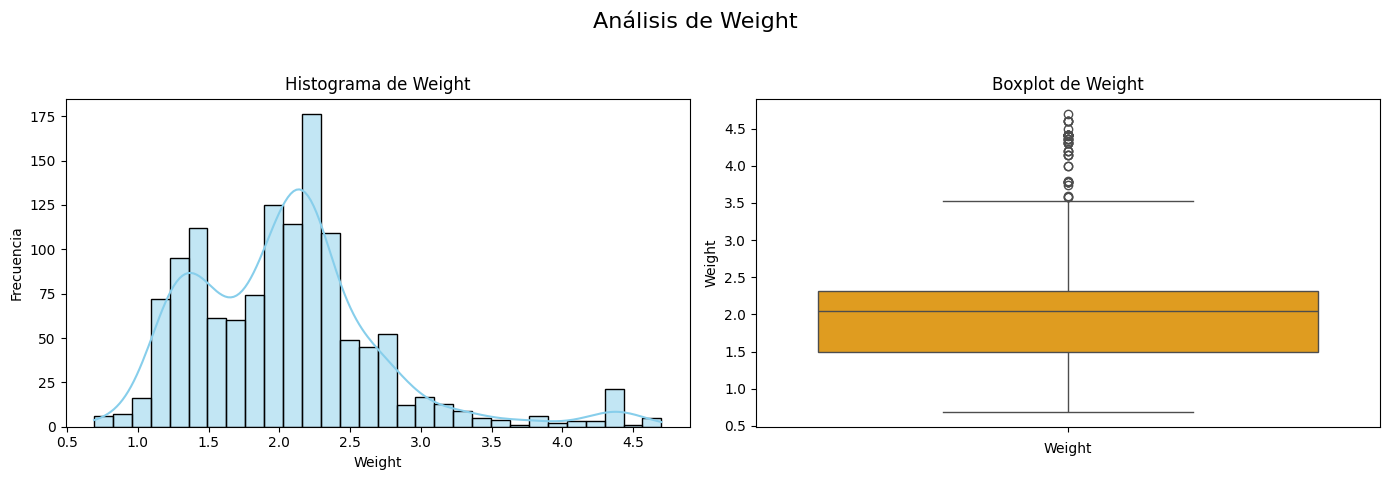

In [26]:
plot_histogram_and_boxplot(laptop_data, ['Weight'])

#### Weight (Peso)

- **Rango típico:** La mayoría de las laptops pesan entre 1 y 2 kg, lo que muestra una tendencia hacia la portabilidad.  
- **Valores atípicos:** Laptops ultraligeras (< 1 kg) o muy pesadas (> 2.5 kg), estas últimas suelen estar relacionadas con gaming o estaciones de trabajo.  
- **Distribución:** Sesgo leve hacia pesos más bajos, con más frecuencia en laptops ligeras.  

**Conclusión:** El peso de las laptops está diseñado para ser funcionalmente portátil, aunque las especializaciones en gaming y productividad aumentan el peso.


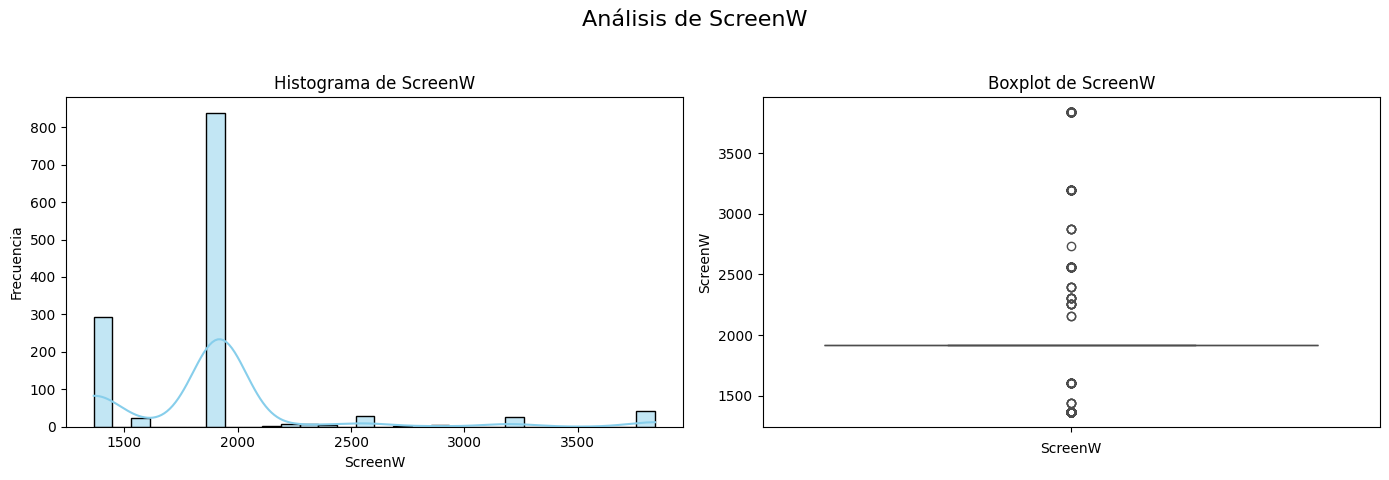

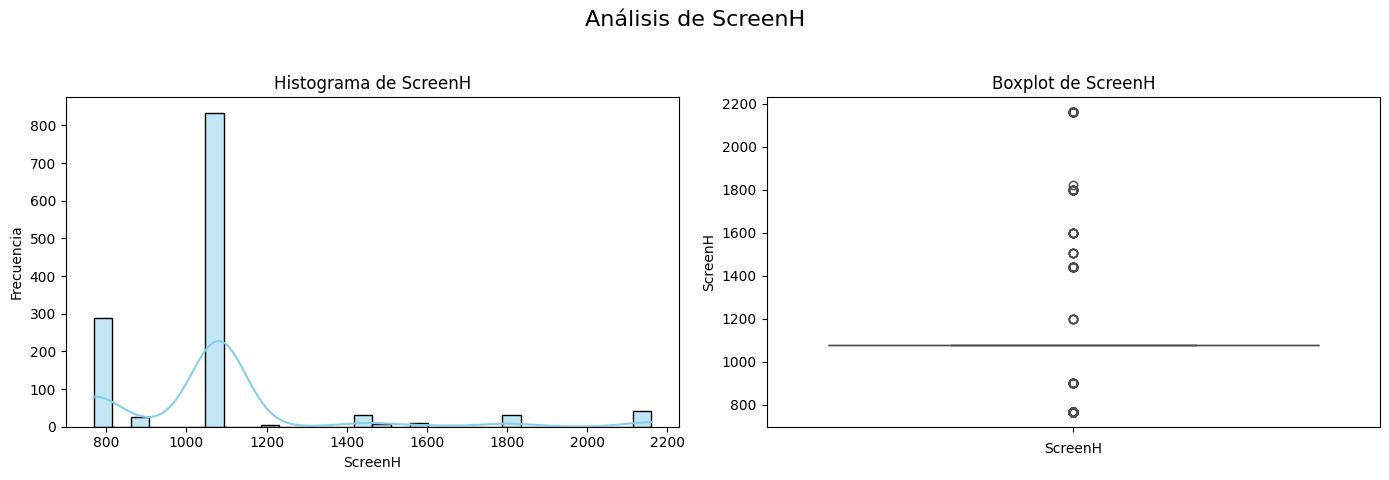

In [27]:
plot_histogram_and_boxplot(laptop_data, ['ScreenW', 'ScreenH'])

In [67]:
(laptop_data['ScreenW'].value_counts(),laptop_data['ScreenH'].value_counts())

(1920    838
 1366    290
 3840     43
 2560     29
 3200     25
 1600     23
 2304      6
 2256      6
 1440      4
 2880      4
 2400      4
 2160      2
 2736      1
 Name: ScreenW, dtype: int64,
 1080    833
 768     290
 2160     43
 1440     31
 1800     29
 900      27
 1600     10
 1504      6
 1200      5
 1824      1
 Name: ScreenH, dtype: int64)

#### Screen Height y Width (Resolución de Pantalla)

- **Rango típico:** Resoluciones estándar Full HD (1920x1080) son las más comunes, con variaciones hacia resoluciones más altas en laptops premium.  
- **Valores atípicos:** Algunas laptops tienen resoluciones superiores (4K y más), destinadas a tareas profesionales o gaming.  
- **Distribución:** Las alturas y anchos tienden a alinearse proporcionalmente, con frecuencias más altas en relaciones estándar como 16:9.  

**Conclusión:** La resolución de pantalla se ajusta a estándares establecidos, con opciones de alta resolución como diferenciador en el mercado premium.


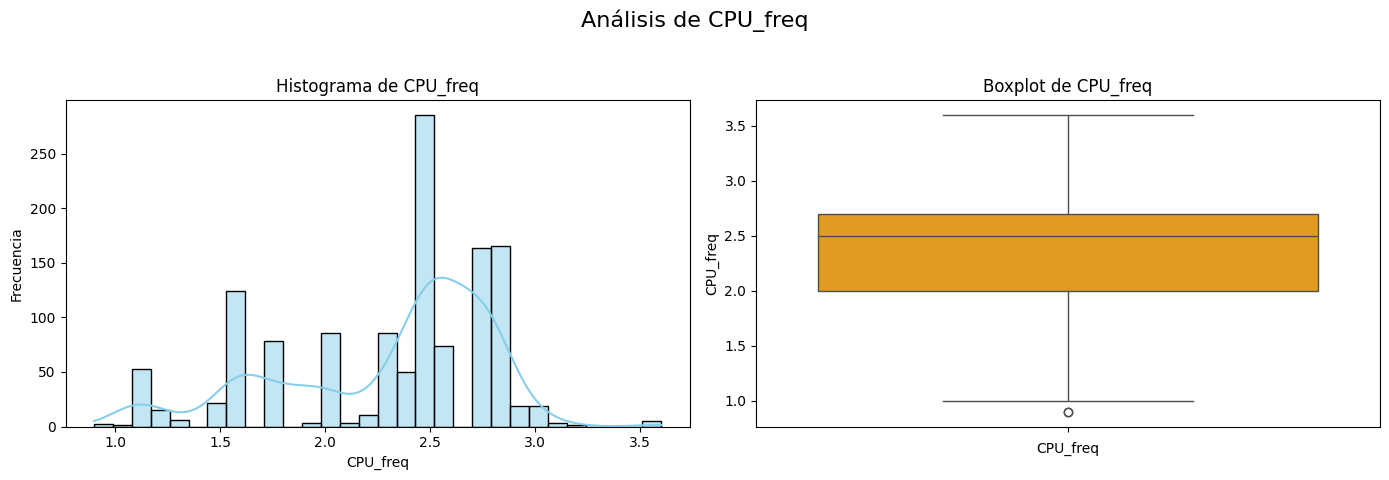

In [28]:
plot_histogram_and_boxplot(laptop_data, ['CPU_freq'])

#### Cpu_Freq (Frecuencia del Procesador)

- **Rango típico:** La mayoría de los procesadores tienen frecuencias entre 2.0 y 3.0 GHz.  
- **Valores atípicos:** Frecuencias superiores (> 4.0 GHz) son raras y corresponden a modelos de alto rendimiento.  
- **Distribución:** Los datos se concentran en valores intermedios, reflejando un equilibrio entre potencia y eficiencia energética.  

**Conclusión:** Las frecuencias de CPU están optimizadas para satisfacer tareas generales, con modelos específicos destacando por su velocidad.


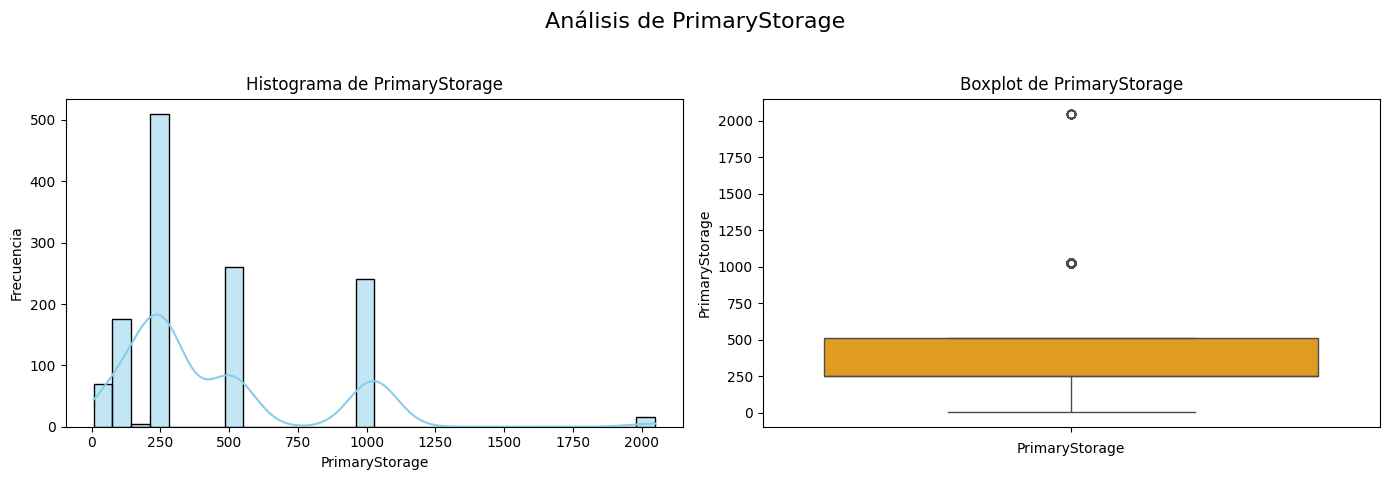

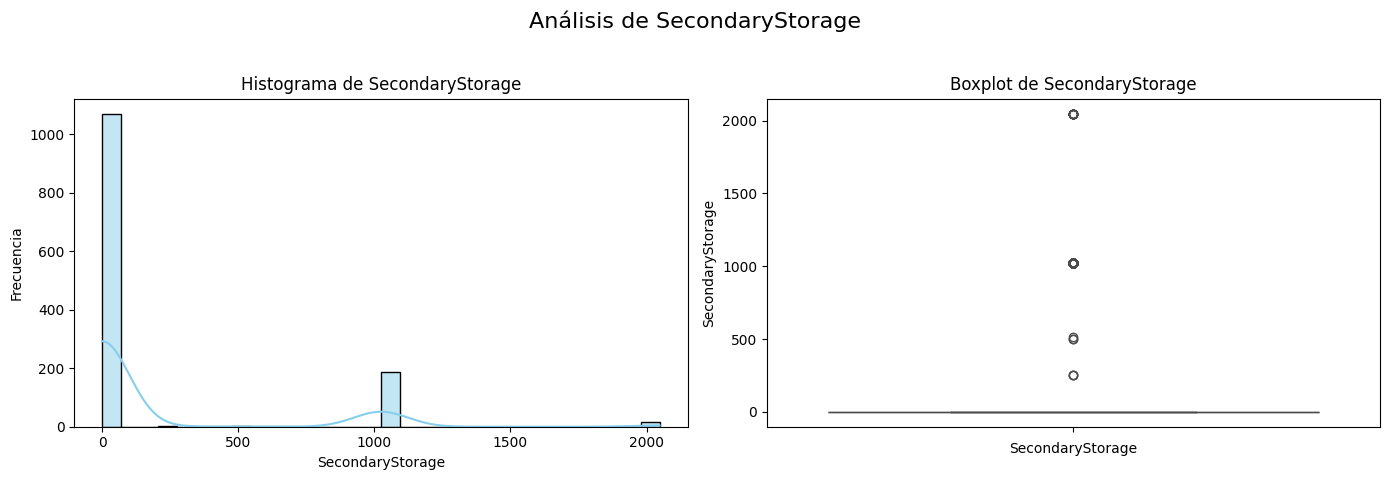

In [31]:
plot_histogram_and_boxplot(laptop_data, ['PrimaryStorage', 'SecondaryStorage'])

In [70]:
(laptop_data['PrimaryStorageType'].value_counts(), laptop_data['SecondaryStorageType'].value_counts())

(SSD              837
 HDD              359
 Flash Storage     71
 Hybrid             8
 Name: PrimaryStorageType, dtype: int64,
 No        1067
 HDD        202
 SSD          4
 Hybrid       2
 Name: SecondaryStorageType, dtype: int64)

#### Primary Storage (Almacenamiento principal)

- **Rango típico:** Entre 256 GB y 512 GB (SSD) son los más frecuentes.  
- **Valores atípicos:** Modelos con almacenamiento de 1 TB o más, diseñados para usuarios que manejan grandes volúmenes de datos.  
- **Distribución:** Se observa una amplia variabilidad, indicando opciones diversas para necesidades específicas.  

**Conclusión:** Las laptops modernas tienden hacia discos SSD para el almacenamiento principal, con almacenamiento secundario siendo menos común y enfocado en necesidades específicas.

---

#### Secondary Storage (Almacenamiento secundario)

- **Rango típico:** Muchas laptops no tienen almacenamiento secundario. Aquellas que sí lo tienen suelen usar discos HDD de alta capacidad (> 1 TB).  
- **Distribución:** La presencia de almacenamiento secundario es menos común y depende del enfoque del modelo (gaming o estaciones de trabajo).  

**Conclusión:** Las laptops modernas tienden hacia discos SSD para el almacenamiento principal, con almacenamiento secundario siendo menos común y enfocado en necesidades específicas.


#### Conclusiones Generales

Los histogramas y boxplots revelan que las laptops están diseñadas principalmente para usuarios promedio, con especificaciones que equilibran funcionalidad y costo. Sin embargo, hay segmentos claros orientados a usuarios especializados, como gamers, profesionales creativos y usuarios que buscan portabilidad extrema.

#### 2.4 Análisis de los precios

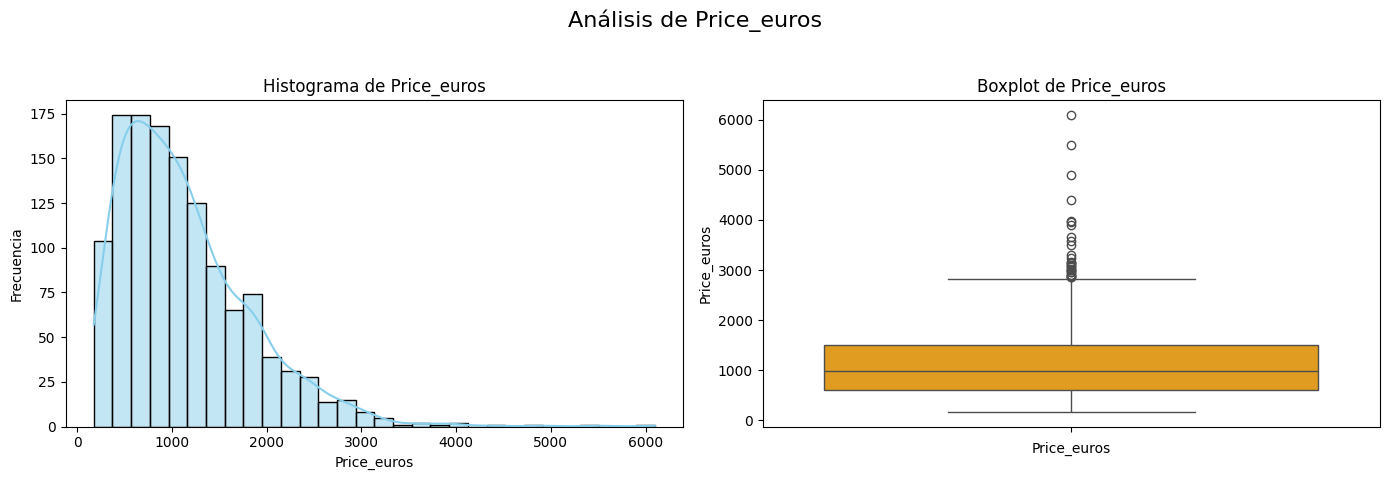

In [24]:
plot_histogram_and_boxplot(laptop_data, ['Price_euros'])

#### Histograma de `Price_euros`

- **Distribución asimétrica (sesgo positivo):**
  - El histograma muestra que la mayoría de los precios están concentrados en el rango entre 500 y 1500 euros.
  - La cola derecha indica la presencia de algunos laptops con precios significativamente más altos (modelos premium).

- **Densidad baja en precios altos:**
  - Hay una caída drástica en la frecuencia conforme los precios aumentan más allá de los 2000 euros, sugiriendo que estos modelos no son comunes en el mercado.

- **Pico en el rango intercuartílico (IQR):**
  - Los valores más densos parecen estar entre 800 y 1200 euros, que es el rango típico para laptops de gama media.

#### Boxplot  de `Price_euros`

- **Presencia de valores atípicos (outliers):**
  - Hay múltiples puntos fuera del límite superior del bigote, indicando modelos con precios excepcionalmente altos.
  - Estos valores atípicos representan laptops de alta gama, estaciones de trabajo o equipos diseñados para propósitos específicos como gaming extremo o edición profesional.

- **Rango intercuartílico (IQR):**
  - El rango típico de precios (IQR) está entre 500 y 1500 euros, lo que incluye la mayoría de las laptops estándar.

- **Mediana de precios:**
  - La línea dentro del box indica que la mediana de precios está por debajo del centro del IQR, lo que confirma un sesgo positivo.

- **Simetría del rango inferior:**
  - El bigote inferior está más cerca del rango intercuartílico, lo que refleja que hay pocos modelos con precios extremadamente bajos.


#### Distribución de `prices_euros`

Según el histograma de la columna `prices_euros`, parece que esta variable no sigue una distribución normal debido a su asimetría positiva (sesgo hacia la derecha). Sin embargo, con base en su forma, podría seguir una distribución Log-Normal.

**Características de la distribución Log-Normal:**
- Es común en datos de precios, ya que estos no pueden tomar valores negativos.
- La mayoría de los valores están concentrados en el rango más bajo, pero hay una cola larga hacia la derecha.

**Justificación:**
El histograma muestra una acumulación en los precios bajos (500-1500 euros) y una cola hacia precios más altos, lo cual es típico de esta distribución.


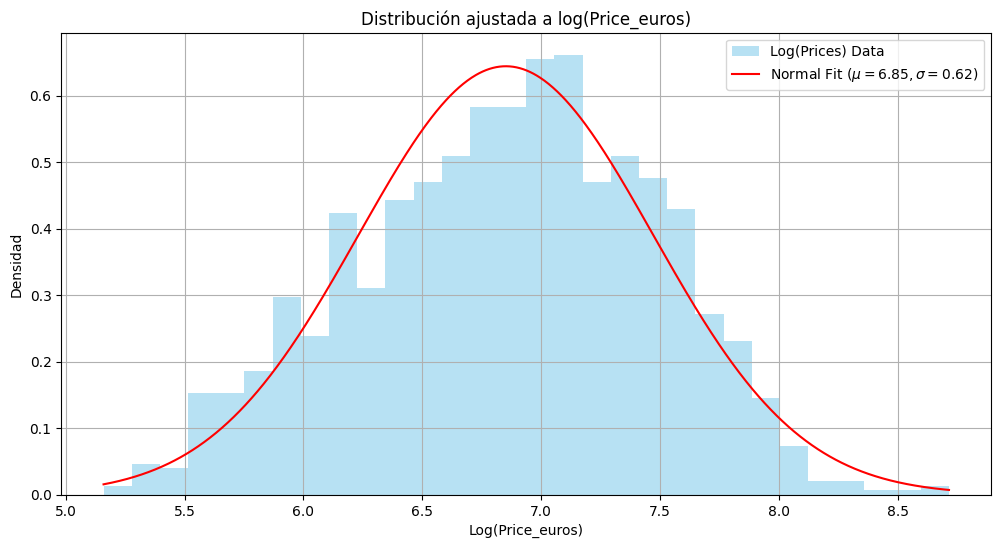

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar valores de Price_euros
price_data = laptop_data['Price_euros'].dropna()

# Aplicar logaritmo natural para modelar como distribución log-normal
log_prices = np.log(price_data)

# Ajustar una distribución normal a los datos transformados
#mu, sigma = stats.norm.fit(log_prices)
mu = np.mean(log_prices)  # Estimador de la Media
sigma = np.sqrt(np.mean((log_prices - mu)**2))  # Estimador de la desviación estándar

# Graficar el ajuste
plt.figure(figsize=(12, 6))

# Histograma de los datos transformados
plt.hist(log_prices, bins=30, density=True, alpha=0.6, color='skyblue', label='Log(Prices) Data')

# Distribución ajustada
x = np.linspace(log_prices.min(), log_prices.max(), 1000)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label=f'Normal Fit ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

plt.title("Distribución ajustada a log(Price_euros)")
plt.xlabel("Log(Price_euros)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


##### Conclusiones de la distribución Log-Normal de `Price_euros`

Con base en el ajuste realizado, los datos transformados mediante el logaritmo natural (`log(Price_euros)`) parecen seguir una distribución normal razonablemente bien. Esto implica que los precios originales (`Price_euros`) se ajustan a una distribución log-normal.

Una distribución log-normal significa que los precios bajos son más frecuentes, mientras que los precios altos ocurren con menor frecuencia pero tienen un impacto significativo.

Este comportamiento es común en mercados donde los valores extremos (como laptops premium) tienen gran importancia en comparación con productos regulares.


### 2.5 Análisis de Columnas Categóricas

In [78]:
# Resumen para variables categóricas: número de valores únicos
categorical_summary = laptop_data.select_dtypes(include='object').nunique().to_frame(name='Unique Values')
categorical_summary

,Unique Values
Company,19
Product,618
TypeName,6
OS,9
Screen,4
Touchscreen,2
IPSpanel,2
RetinaDisplay,2
CPU_company,3
CPU_model,93


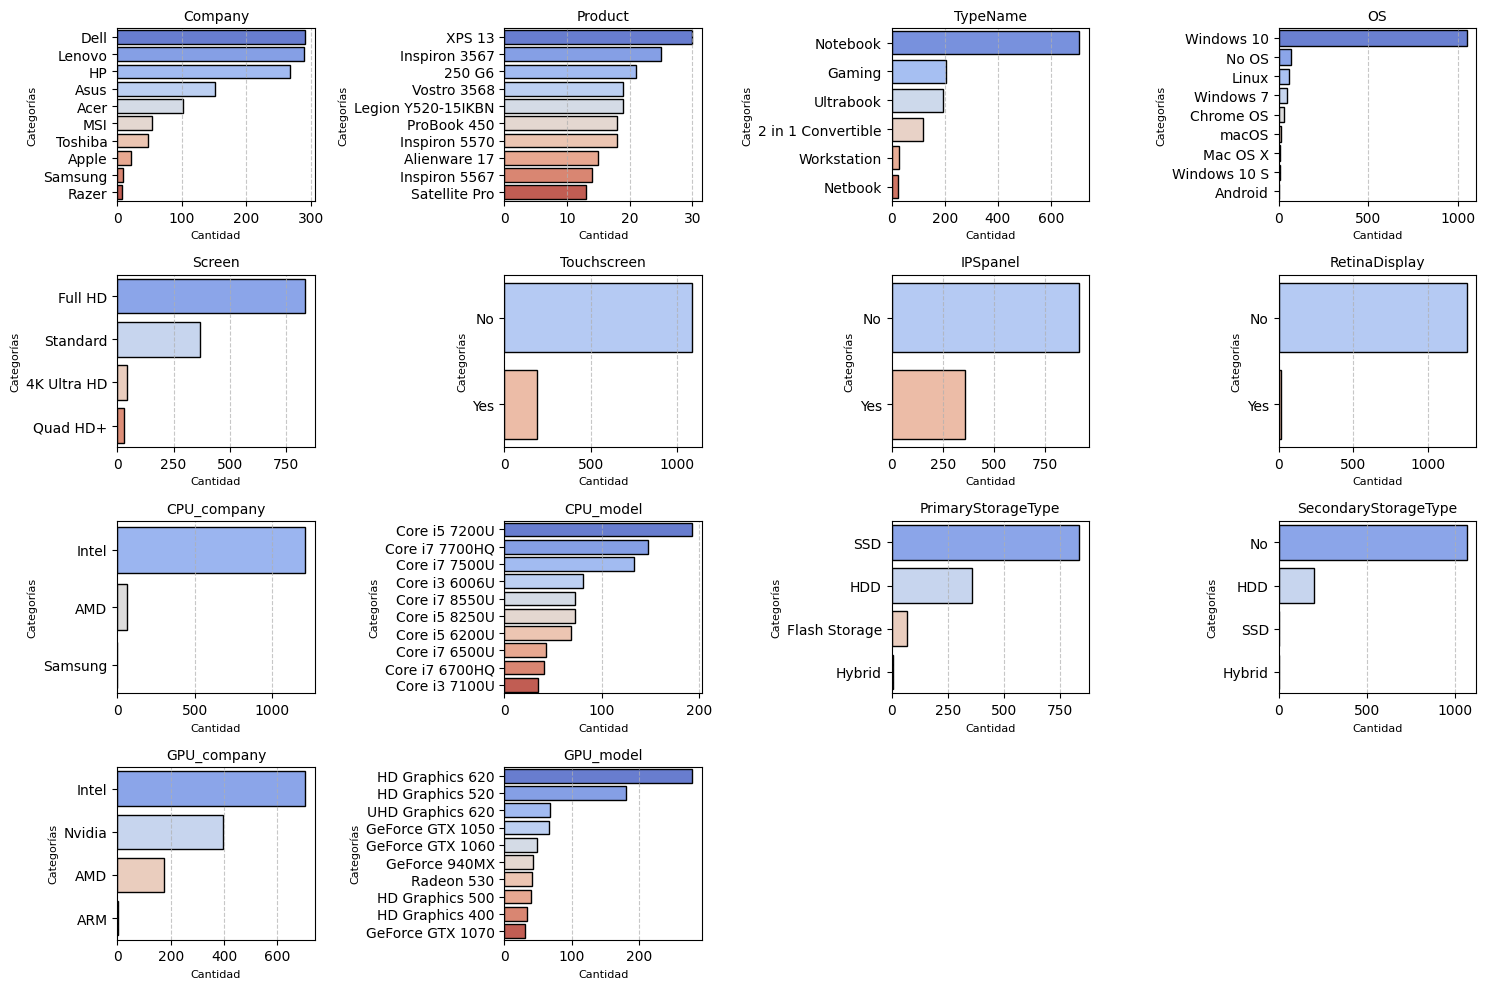

In [84]:
# Graficar los valores únicos de las columnas categóricas
categorical_columns = laptop_data.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    unique_counts = laptop_data[col].value_counts().head(10)  # Top 10 categorías
    sns.barplot(
        y=unique_counts.index, 
        x=unique_counts.values, 
        palette='coolwarm', 
        edgecolor='black', 
        hue=unique_counts.index, 
        dodge=False 
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Cantidad', fontsize=8)
    plt.ylabel('Categorías', fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Company
- Las marcas más representadas son **HP**, **Dell** y **Lenovo**, lo que sugiere que estas dominan el mercado.  
- Marcas como **Apple** tienen una menor frecuencia, lo que podría deberse a su enfoque en un segmento premium o de nicho.  
- La diversidad de fabricantes es moderada, con varias marcas menos conocidas presentes, pero en menor proporción.  

---

##### 2. Product
- La distribución está muy dispersa, con varios modelos específicos que aparecen una o dos veces.  
- Algunos modelos como **Inspiron** o **Pavilion** podrían destacar en frecuencia debido a su popularidad dentro de marcas como Dell o HP.  
- Esto refleja una alta variedad de opciones en el mercado, dificultando identificar líderes claros más allá de las marcas principales.  

---

##### 3. TypeName
- Las categorías más comunes son **Notebook** y **Ultrabook**, lo que indica que el mercado está orientado hacia dispositivos portátiles ligeros y versátiles.  
- **Gaming** y **Workstation** son menos frecuentes, reflejando su enfoque en usuarios más especializados.  
- La categoría **2 in 1 Convertible** es notable, destacando la tendencia hacia dispositivos híbridos.  

---

##### 4. OS (Sistema Operativo)
- Windows domina ampliamente, seguido por macOS. Esto confirma la popularidad de Windows en laptops comerciales y de uso general.  
- Otros sistemas como Linux o Chrome OS tienen una representación marginal, probablemente dirigidos a nichos específicos.  

---

##### 5. Screen (Resolución de pantalla)
- Las resoluciones **Full HD (1920x1080)** son las más comunes, confirmando que este estándar satisface la mayoría de las necesidades de los usuarios.  
- Resoluciones más altas, como **4K**, aparecen menos frecuentemente, sugiriendo su asociación con dispositivos premium o de uso profesional.  
- Resoluciones más bajas (como 1366x768) aún están presentes, posiblemente en laptops más económicas o antiguas.  

---

##### 6. Touchscreen
- La mayoría de las laptops no tienen pantallas táctiles, lo que podría reflejar un enfoque en dispositivos tradicionales.  
- Los dispositivos con pantallas táctiles están presentes, pero en menor proporción, probablemente en ultrabooks o modelos convertibles.  

---

##### 7. IPSpanel
- La mayoría de las laptops no utilizan paneles IPS, lo que sugiere que los paneles estándar son suficientes para el consumidor promedio.  
- Los paneles IPS, más comunes en dispositivos premium o orientados al diseño gráfico, son menos frecuentes.  

---

##### 8. RetinaDisplay
- La representación de pantallas Retina está limitada, lo cual es lógico, ya que este término está asociado exclusivamente con dispositivos Apple.  

---

##### 9. CPU_company
- **Intel** domina ampliamente, seguido por **AMD** en una proporción significativamente menor.  
- Otras marcas son prácticamente inexistentes, lo que refleja la hegemonía de Intel y AMD en el mercado de procesadores para laptops.  

---

##### 10. CPU_model
- Existe una gran diversidad de modelos de CPU, reflejando la segmentación del mercado según el rendimiento y el precio.  
- Modelos como **Core i5** e **i7** de Intel probablemente lideran, dado su equilibrio entre costo y rendimiento.  

---

##### 11. PrimaryStorageType
- Los discos **SSD** dominan, indicando la transición generalizada hacia este tipo de almacenamiento por su velocidad y eficiencia.  
- Los HDD todavía están presentes, probablemente en laptops económicas o con grandes capacidades de almacenamiento.  

---

##### 12. SecondaryStorageType
- Muchas laptops no tienen almacenamiento secundario, lo que sugiere una tendencia hacia configuraciones simplificadas con un solo tipo de almacenamiento.  
- Aquellas que tienen almacenamiento secundario tienden a usar HDD, probablemente para complementar el almacenamiento rápido del SSD.  

---

##### 13. GPU_company
- **NVIDIA** domina en GPUs dedicadas, lo que refleja su liderazgo en el segmento de gaming y computación gráfica.  
- **Intel** lidera en GPUs integradas, siendo una opción estándar para tareas no intensivas.  
- AMD tiene una representación menor, pero aún relevante en el mercado de GPUs.  

---

##### 14. GPU_model
- Hay una alta diversidad de modelos, lo que refleja un mercado segmentado según necesidades específicas de rendimiento gráfico.  
- Modelos básicos dominan, mientras que GPUs de gama alta, como las de la serie NVIDIA GTX/RTX, son menos frecuentes y probablemente están asociadas a laptops gaming o estaciones de trabajo.  
